In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


In [2]:
# Load the dataset
df = pd.read_csv('bank-additional-full.csv', sep=';')
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# Check shape and missing values
print("Shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())

# Check data types
df.info()


Shape: (41188, 21)

Missing values:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact    

In [4]:
from sklearn.preprocessing import LabelEncoder

# Make a copy to preserve original data
data = df.copy()

# Initialize LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to all object (categorical) columns
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = le.fit_transform(data[column])

# Check encoded data
print(data.head())


   age  job  marital  education  default  housing  loan  contact  month  \
0   56    3        1          0        0        0     0        1      6   
1   57    7        1          3        1        0     0        1      6   
2   37    7        1          3        0        2     0        1      6   
3   40    0        1          1        0        0     0        1      6   
4   56    7        1          3        0        0     2        1      6   

   day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0            1  ...         1    999         0         1           1.1   
1            1  ...         1    999         0         1           1.1   
2            1  ...         1    999         0         1           1.1   
3            1  ...         1    999         0         1           1.1   
4            1  ...         1    999         0         1           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0          93.994          -36.4      4.85

In [6]:
#Improve Model Using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict
rf_pred = rf_model.predict(X_test)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_pred))


Random Forest Accuracy: 0.9133284777858703

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      7303
           1       0.65      0.51      0.57       935

    accuracy                           0.91      8238
   macro avg       0.79      0.74      0.76      8238
weighted avg       0.91      0.91      0.91      8238


Confusion Matrix:
 [[7045  258]
 [ 456  479]]


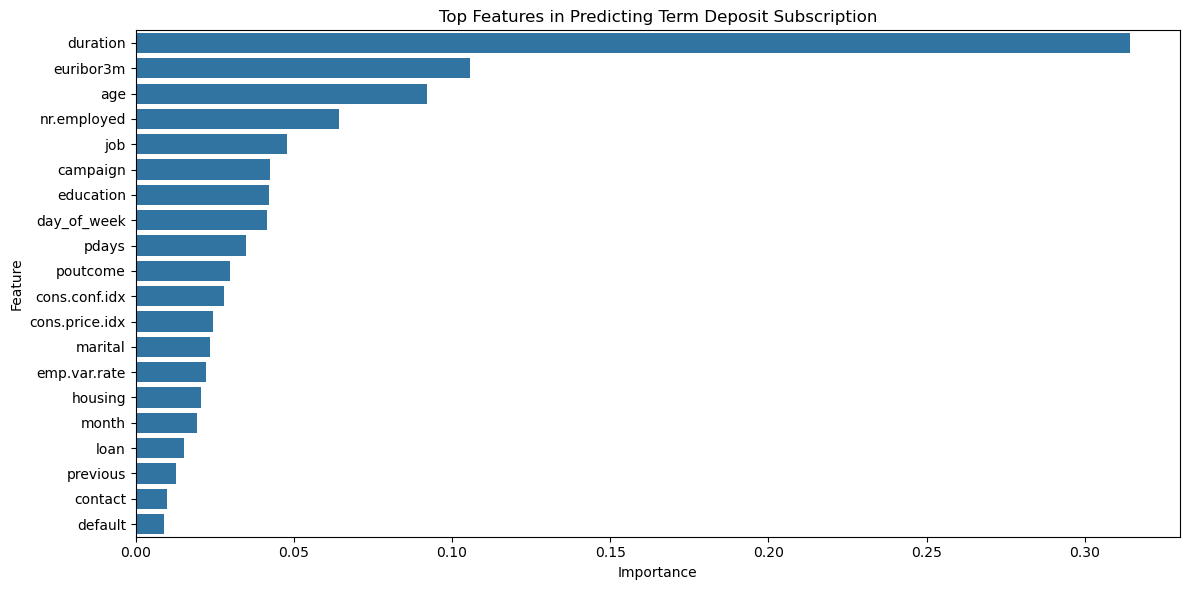

In [7]:
#Visualizing
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = rf_model.feature_importances_
features = X.columns

# Create DataFrame and sort
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Top Features in Predicting Term Deposit Subscription")
plt.tight_layout()
plt.show()


In [8]:
import joblib

# Save the model to a file
joblib.dump(rf_model, 'bank_marketing_model.pkl')
print("Model saved successfully!")


Model saved successfully!


In [13]:
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [14]:
# Save model
import joblib
joblib.dump(model, 'rf_model.pkl')

# Save the training column order (very important!)
joblib.dump(X_train.columns.tolist(), 'model_columns.pkl')


['model_columns.pkl']

In [17]:
##Building a simple prediction system
import pandas as pd
import joblib

# Load the saved model and column names
model = joblib.load('rf_model.pkl')
model_columns = joblib.load('model_columns.pkl')

def predict_subscription(input_data):
    """
    Predicts whether a user will subscribe or not based on input data.
    input_data should be a dictionary of features.
    """
    # Convert input dictionary to DataFrame
    df = pd.DataFrame([input_data])
    
    # Reindex the DataFrame to match training column order
    df = df.reindex(columns=model_columns, fill_value=0)

    # Predict
    prediction = model.predict(df)[0]

    if prediction == 1:
        return "✅ The person is likely to SUBSCRIBE."
    else:
        return "❌ The person is NOT likely to subscribe."


In [16]:
# Load the saved column names
model_columns = joblib.load('model_columns.pkl')

# Prepare a sample input with all required columns
sample_input = {col: 0 for col in model_columns}  # set all to 0 for now
sample_input['age'] = 35
sample_input['duration'] = 300
sample_input['campaign'] = 2
sample_input['job_admin.'] = 1  # assuming one-hot encoded
# ... set other relevant fields

# Predict
result = predict_subscription(sample_input)
print(result)


✅ The person is likely to SUBSCRIBE.


In [5]:
# Encode categorical variables
import pandas as pd
import numpy as np
df = pd.read_csv('bank-additional-full.csv', sep=';')
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
for column in df_encoded.columns:
    if df_encoded[column].dtype == 'object':
        le = LabelEncoder()
        df_encoded[column] = le.fit_transform(df_encoded[column])

# Split features and target
X = df_encoded.drop('y', axis=1)  # Features (demographic + behavioral)
y = df_encoded['y']               # Target (whether customer purchased)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Train Decision Tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict
dt_predictions = dt_model.predict(X_test)

# Evaluate
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_predictions))
print("\nClassification Report:\n", classification_report(y_test, dt_predictions))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, dt_predictions))


Decision Tree Accuracy: 0.8894149065307113

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      7303
           1       0.51      0.51      0.51       935

    accuracy                           0.89      8238
   macro avg       0.73      0.73      0.73      8238
weighted avg       0.89      0.89      0.89      8238


Confusion Matrix:
 [[6846  457]
 [ 454  481]]


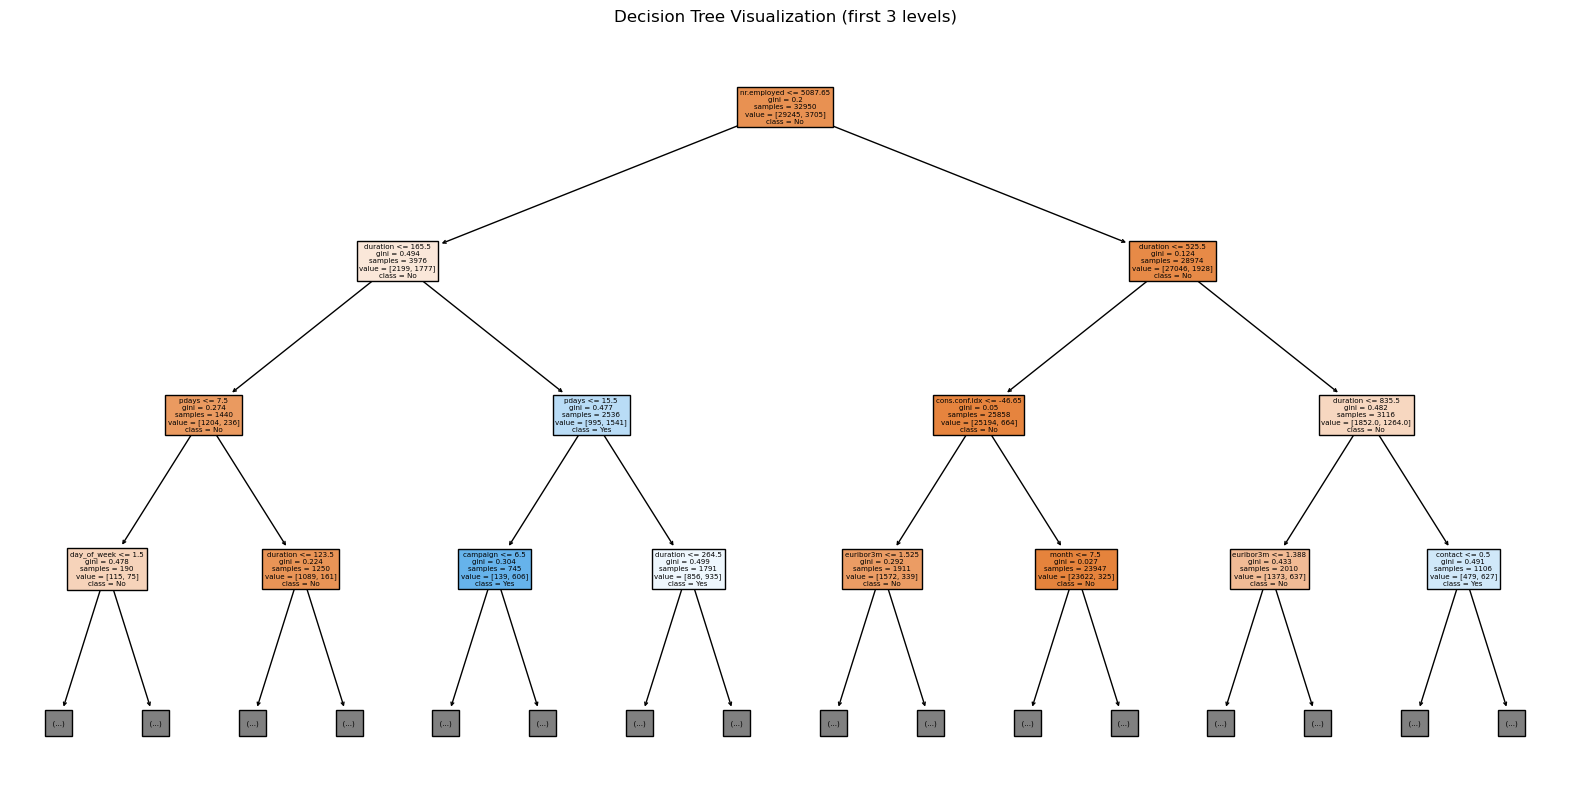

In [7]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, max_depth=3)
plt.title("Decision Tree Visualization (first 3 levels)")
plt.show()


In [8]:
import joblib

# Save the Decision Tree model to a file
joblib.dump(dt_model, 'decision_tree_model.pkl')

print("✅ Decision Tree model saved successfully as 'decision_tree_model.pkl'")


✅ Decision Tree model saved successfully as 'decision_tree_model.pkl'
